<a href="https://colab.research.google.com/github/Davidospina1000/Data-Integration/blob/main/RetoParcial1_Integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración de Datos (Reto Parcial)

Una Empresa del Sector Palmicultor está interesada en la caracterización del riesgo asociado con la pérdida de productividad mensual en sus operaciones.

0. Se cargan las librerías de trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from scipy.stats import skew,kurtosis


1. Se cargan los datos de trabajo

In [ ]:
nxl = '/content/3. Perdida Productividad_Zonas(I).xlsx'
XDBo=pd.read_excel(nxl,sheet_name=0); XDBo=XDBo.dropna()
XDBe1=pd.read_excel(nxl,sheet_name=1); XDBe1=XDBe1.dropna()
XDBe2=pd.read_excel(nxl,sheet_name=2); XDBe2=XDBe2.dropna()
XDBe3=pd.read_excel(nxl,sheet_name=3); XDBe3=XDBe3.dropna()
XDBe4=pd.read_excel(nxl,sheet_name=4); XDBe4=XDBe4.dropna()

LDAo=XDBo['LDA']
LDAe1=XDBe1['LDA']
LDAe2=XDBe2['LDA']
LDAe3=XDBe3['LDA']
LDAe4=XDBe4['LDA']

NLDAo=len(LDAo);NLDBe1=len(LDAe1);NLDBe2=len(LDAe2);NLDBe3=len(LDAe3);NLDBe4=len(LDAe4)

In [ ]:
def metricas(XLDA,p):
  u=np.mean(XLDA)
  var=np.var(XLDA)
  stdv=np.sqrt(var)
  cas=skew(XLDA)
  ck=kurtosis(XLDA)
  ND=len(XLDA)
  LI = u + 1.96*stdv
  LS = u - 1.96*stdv
  ek2=((1.96**2)*p*(1-p)/ND)
  ek=np.sqrt(ek2)

  if abs(cas)<0.5 and abs(ck)<0.5:
      tpdst="Posible distribución Normal"

  elif cas>0 and ck>3:
    if ck>=8:
      tpdst="Posible distribución Exponencial"
    elif ck>=6:
      tpdst="Posible distribución Gamma"
    else:
      tpdst="Posible distribución Weibull"

  elif cas<0 and ck<3:
    tpdst="Posible distribución Beta"
  elif ck<3:
    tpdst="Posible distribución Uniforme"
  else:
    tpdst="No se pudo identificar la distribución"

  return u,var,stdv,cas,ck,LI,LS,ek,tpdst

In [ ]:
metLDAo=metricas(LDAo,0.955);metLDAe1=metricas(LDAe1,0.955);metLDAe2=metricas(LDAe2,0.955);metLDAe3=metricas(LDAe3,0.955);metLDAe4=metricas(LDAe4,0.955)

In [ ]:
df = pd.DataFrame([metLDAo, metLDAe1, metLDAe2, metLDAe3, metLDAe4],
                  index=["LDAo", "LDAe1", "LDAe2", "LDAe3", "LDAe4"], columns=["u", "var", "stdv", "cas", "ck", "LI", "LS", "ek", "tpdst"])
df

,u,var,stdv,cas,ck,LI,LS,ek,tpdst
LDAo,3.770379e+06,2.484680e+13,4.984657e+06,0.796750,1.988308,1.354031e+07,-5.999548e+06,0.026505,Posible distribución Uniforme
LDAe1,3.648873e+06,3.263279e+13,5.712512e+06,0.348014,3.847707,1.484540e+07,-7.547650e+06,0.026505,Posible distribución Weibull
LDAe2,3.632319e+06,2.397170e+13,4.896090e+06,0.490024,1.837397,1.322866e+07,-5.964019e+06,0.026505,Posible distribución Uniforme
LDAe3,3.617979e+06,2.702544e+13,5.198600e+06,-0.056044,3.035682,1.380724e+07,-6.571278e+06,0.026505,No se pudo identificar la distribución
LDAe4,3.531558e+06,3.190314e+13,5.648286e+06,-0.373578,3.679393,1.460220e+07,-7.539083e+06,0.026505,No se pudo identificar la distribución


In [ ]:
def montecarlo(LDA, num_samples):
    counts, bin_edges = np.histogram(LDA, bins=10)
    LI = bin_edges[:-1]
    LS = bin_edges[1:]
    mc = (LI + LS) / 2
    pdf = counts / sum(counts)
    cdf = np.cumsum(pdf)

    TI = LS[0] - LI[0]

    LDAm = np.zeros((num_samples, 1))

    for i in range(num_samples):
        aleatorio = rnd.random()
        Intervalo = np.array(np.where((aleatorio < cdf)))
        aleatorio2 = rnd.random()
        LDAm[i] = LI[Intervalo[0, 0]] + TI * aleatorio2

    plt.figure()
    sns.histplot(LDA, bins=10, kde=True, color='red')
    sns.histplot(LDAm, bins=10, kde=True, color='green')
    plt.legend(['Distribución LDA', 'Simulación MonteCarlo'])
    plt.show()

    return LDAm


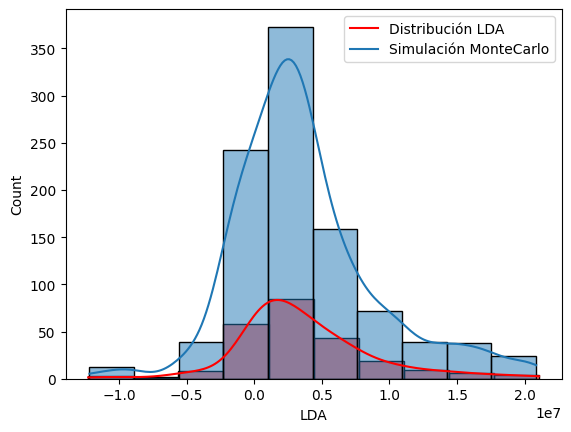

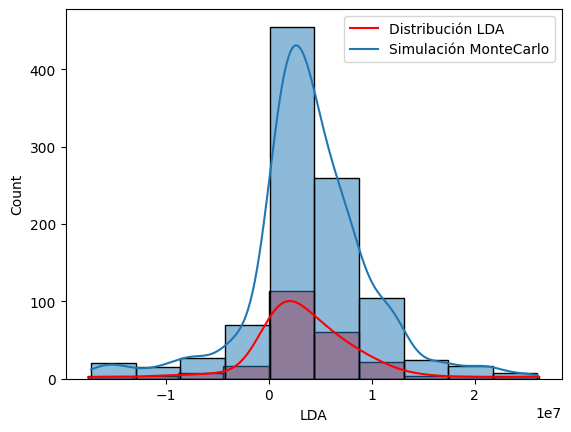

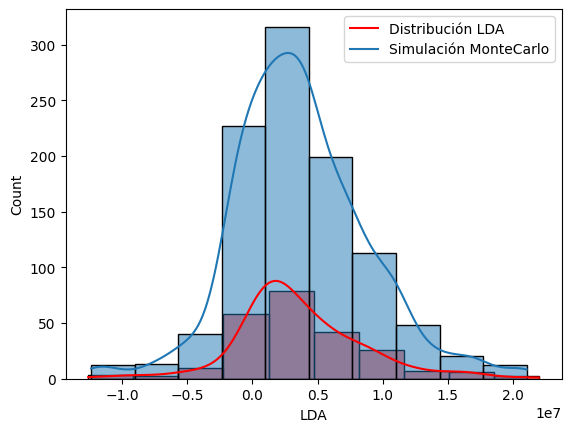

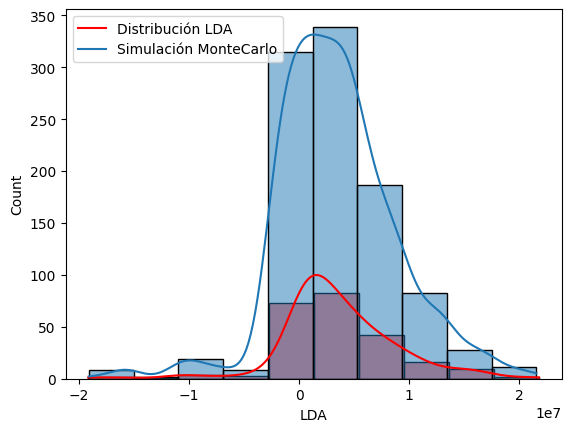

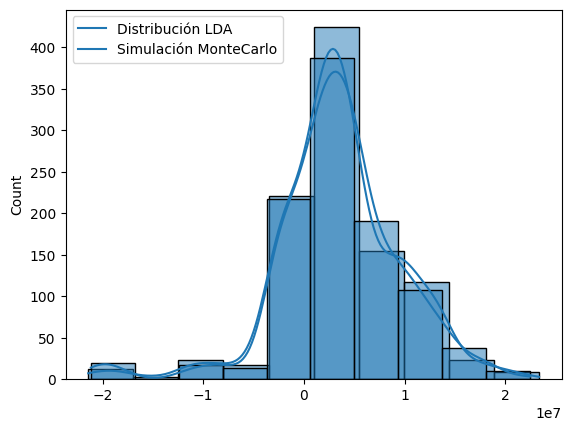

,u,var,stdv,cas,ck,LI,LS,ek,tpdst
LDAo,3.770379e+06,2.484680e+13,4.984657e+06,0.79675,1.988308,1.354031e+07,-5.999548e+06,0.026505,Posible distribución Uniforme
LDAoMC,3.719000e+06,2.822647e+13,5.312859e+06,[0.8299237945666886],[1.3695156228226981],1.413220e+07,-6.694203e+06,0.001959,Posible distribución Uniforme
LDAe1,3.648873e+06,3.263279e+13,5.712512e+06,0.348014,3.847707,1.484540e+07,-7.547650e+06,0.026505,Posible distribución Weibull
LDAe1MC,3.979345e+06,3.619096e+13,6.015892e+06,[-0.13286817441236617],[2.5977445287371816],1.577049e+07,-7.811804e+06,0.001959,Posible distribución Beta
LDAe2,3.632319e+06,2.397170e+13,4.896090e+06,0.490024,1.837397,1.322866e+07,-5.964019e+06,0.026505,Posible distribución Uniforme
LDAe2MC,3.673083e+06,2.656100e+13,5.153737e+06,[0.35480474096841436],[1.0844262568108345],1.377441e+07,-6.428241e+06,0.001959,Posible distribución Uniforme
LDAe3,3.617979e+06,2.702544e+13,5.198600e+06,-0.056044,3.035682,1.380724e+07,-6.571278e+06,0.026505,No se pudo identificar la distribución
LDAe3MC,3.441001e+06,2.956310e+13,5.437196e+06,[0.04065206436216424],[1.6757995205358842],1.409790e+07,-7.215903e+06,0.001959,Posible distribución Uniforme
LDAe4,3.531558e+06,3.190314e+13,5.648286e+06,-0.373578,3.679393,1.460220e+07,-7.539083e+06,0.026505,No se pudo identificar la distribución
LDAe4MC,3.451506e+06,3.852257e+13,6.206656e+06,[-0.675478970522187],[2.8753574633240087],1.561655e+07,-8.713539e+06,0.001959,Posible distribución Beta


In [ ]:
LDAoMC=montecarlo(LDAo,1000);LDAe1MC=montecarlo(LDAe1,1000);LDAe2MC=montecarlo(LDAe2,1000)
LDAe3MC=montecarlo(LDAe3,1000);LDAe4=montecarlo(LDAe4,1000)

metLDAoMC=metricas(LDAoMC,0.999);metLDAe1MC=metricas(LDAe1MC,0.999);metLDAe2MC=metricas(LDAe2MC,0.999)
metLDAe3MC=metricas(LDAe3MC,0.999);metLDAe4MC=metricas(LDAe4,0.999)

dfMC = pd.DataFrame([metLDAo, metLDAoMC, metLDAe1, metLDAe1MC, metLDAe2, metLDAe2MC, metLDAe3, metLDAe3MC, metLDAe4, metLDAe4MC],
                  index=["LDAo", "LDAoMC", "LDAe1", "LDAe1MC", "LDAe2", "LDAe2MC", "LDAe3", "LDAe3MC", "LDAe4", "LDAe4MC"],
                    columns=["u", "var", "stdv", "cas", "ck", "LI", "LS", "ek", "tpdst"])
dfMC

In [ ]:
def calcular_perdidas(LDA):
    u = np.mean(LDA)  # Límite superior de las pérdidas esperadas (Zona 1)
    OpVar = np.percentile(LDA, 99.9)  # Valor Asegurado OpVar (Zona 3)
    PNE = (u + OpVar) / 2  # Pérdidas esperadas (Zona 2)

    print("Las pérdidas esperadas son:\n", u)
    print("Las pérdidas no esperadas son:\n", PNE)
    print("El valor de la póliza de aseguramiento:\n", OpVar)

    plt.figure()
    sns.histplot(LDA, bins=10, kde=True, color='red')
    plt.legend(['Distribución LDA'])
    plt.show()

    return u, PNE, OpVar

Las pérdidas esperadas son:
 3719000.335366
Las pérdidas no esperadas son:
 12248050.905306265
El valor de la póliza de aseguramiento:
 20777101.47524653


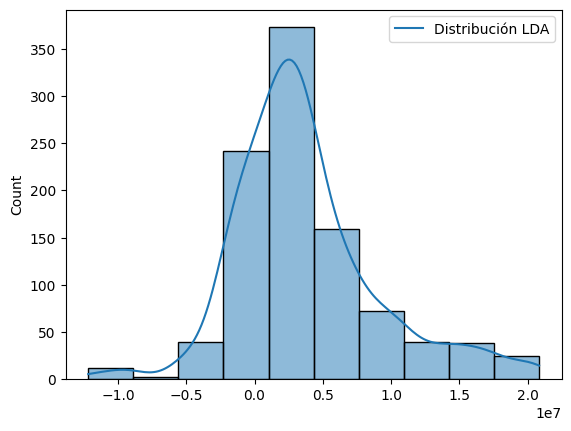

Las pérdidas esperadas son:
 3648873.460819753
Las pérdidas no esperadas son:
 14926725.719033558
El valor de la póliza de aseguramiento:
 26204577.977247365


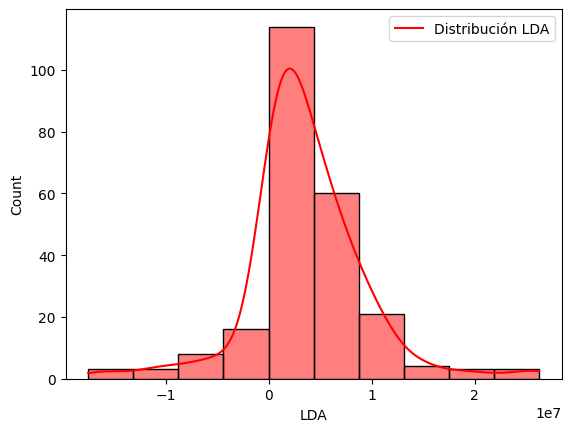

Las pérdidas esperadas son:
 3632318.7444114513
Las pérdidas no esperadas son:
 12510809.614606299
El valor de la póliza de aseguramiento:
 21389300.484801147


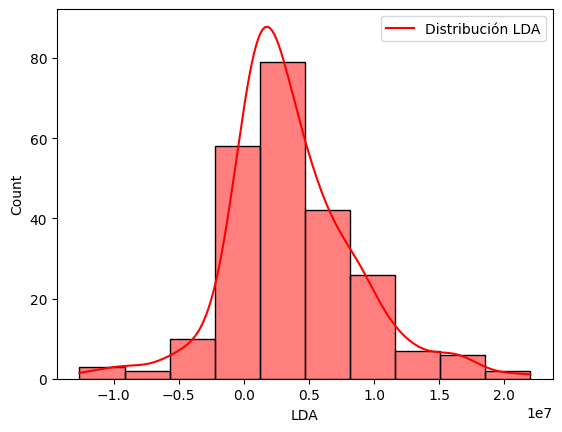

Las pérdidas esperadas son:
 3617978.618754104
Las pérdidas no esperadas son:
 12413896.651669674
El valor de la póliza de aseguramiento:
 21209814.684585243


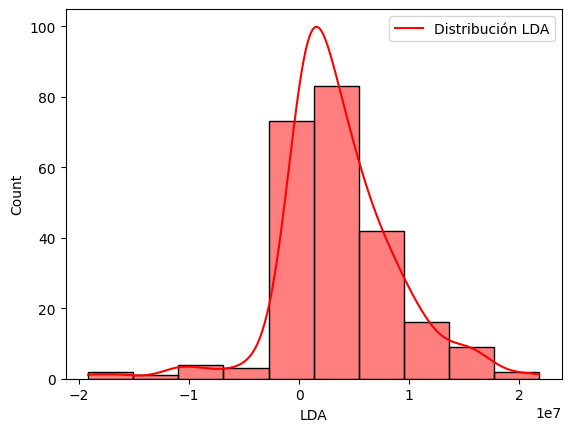

Las pérdidas esperadas son:
 3451506.238236344
Las pérdidas no esperadas son:
 12852132.929505326
El valor de la póliza de aseguramiento:
 22252759.620774306


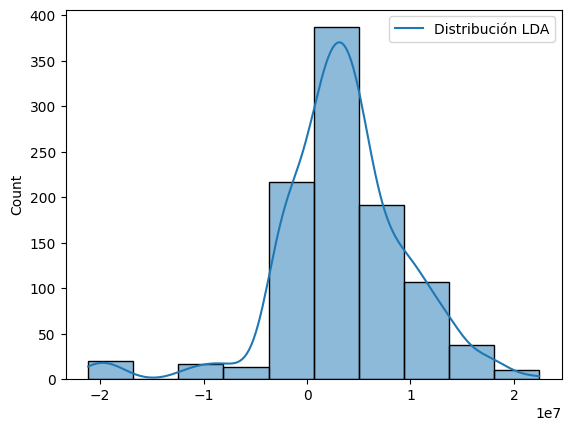

In [ ]:
perLDAo=calcular_perdidas(LDAoMC);perLDAe1=calcular_perdidas(LDAe1);perLDAe2=calcular_perdidas(LDAe2)
perLDAe3=calcular_perdidas(LDAe3);perLDAe4=calcular_perdidas(LDAe4)

In [ ]:
def Credibilidad(LDAo,LDAe):
  #LDAo indica los datos observados-internos
  #LDAe indica los datos externos.integración
  NDo=len(LDAo);NDe=len(LDAe)
  varo=np.var(LDAo);vare=np.var(LDAe)
  uo=np.mean(LDAo);ue=np.mean(LDAe)

  EPV=(NDo*varo+NDe*vare)/(NDo+NDe)
  MH=(NDo*uo+NDe*ue)/(NDo+NDe) #Media Hipotética
  pNDo=NDo/(NDo+NDe);pNDe=NDe/(NDo+NDe)

  VHM = pNDo*uo**2+pNDe*ue**2-MH**2

  Cr=NDo/(NDo+(EPV/VHM))

  return Cr

In [ ]:
cred1=Credibilidad(LDAoMC,LDAe1);cred2=Credibilidad(LDAoMC,LDAe2);cred3=Credibilidad(LDAoMC,LDAe3);cred4=Credibilidad(LDAoMC,LDAe4)
print('La credibilidad de LDAoMC vs LDAe1 es:',cred1)
print('La credibilidad de LDAoMC vs LDAe2 es: ',cred2)
print('La credibilidad de LDAoMC vs LDAe3 es: ',cred3)
print('La credibilidad de LDAoMC vs LDAe4 es: ',cred4)

La credibilidad de LDAoMC vs LDAe1 es: 0.025407210437901794
La credibilidad de LDAoMC vs LDAe2 es:  0.04051431708059086
La credibilidad de LDAoMC vs LDAe3 es:  0.05317496210667688
La credibilidad de LDAoMC vs LDAe4 es:  0.34895236290140513


In [ ]:
def pertenencia (LI, LS, mobs, mdex, num_points=100):
    x = np.linspace(LI, LS, num_points)
    VPo = np.exp(-0.5 * ((x - mobs[0]) / mobs[2])**2)
    VPe = np.exp(-0.5 * ((x - mdex[0]) / mdex[2])**2)
    plt.figure()
    plt.plot(x, VPo, color='green', label='Internos')
    plt.plot(x, VPe, color='orange', label='Externos')
    plt.legend()
    plt.grid()
    plt.show()

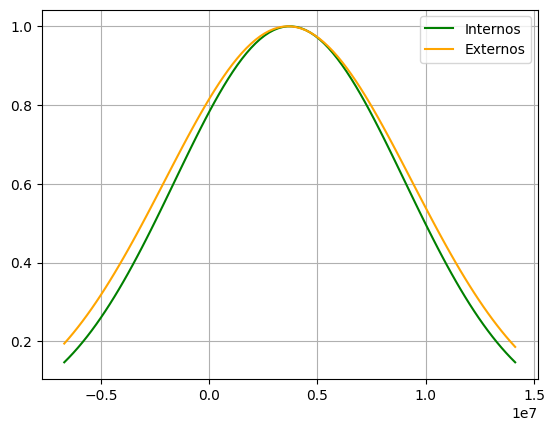

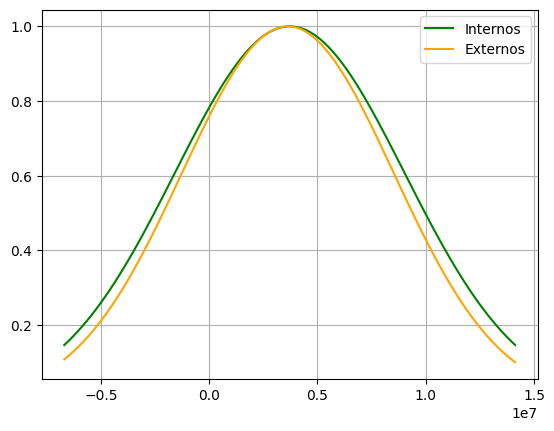

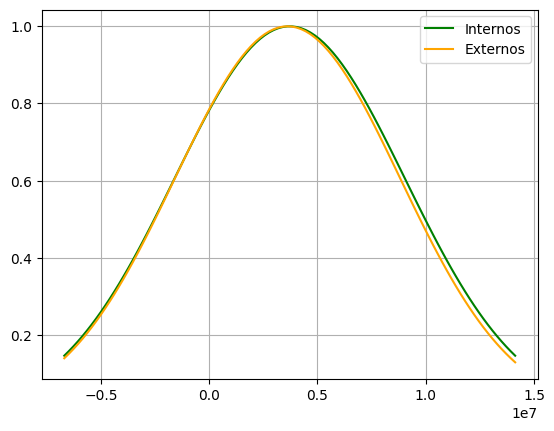

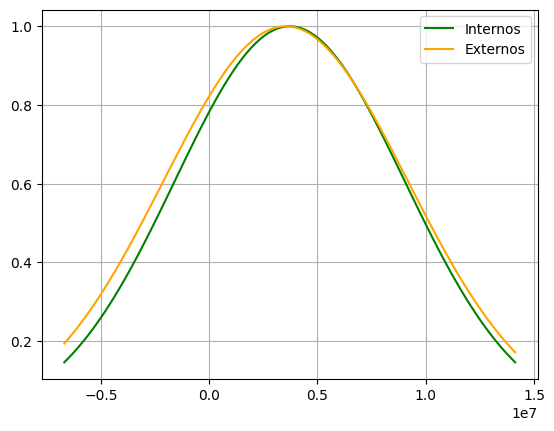

In [ ]:
pert1 = pertenencia(metLDAoMC[5], metLDAoMC[6], metLDAoMC, metLDAe1)
pert2 = pertenencia(metLDAoMC[5], metLDAoMC[6], metLDAoMC, metLDAe2)
pert3 = pertenencia(metLDAoMC[5], metLDAoMC[6], metLDAoMC, metLDAe3)
pert4 = pertenencia(metLDAoMC[5], metLDAoMC[6], metLDAoMC, metLDAe4)

In [ ]:
def integracion (LDAe, mobs, mdex):
    # Evaluamos los datos externos con respecto a la estructura interna y externa
    VPoint = np.exp(-0.5 * ((LDAe - mobs[0]) / mobs[2])**2)
    VPeint = np.exp(-0.5 * ((LDAe - mdex[0]) / mdex[2])**2)
    # Filtramos los datos donde la distribución externa está por debajo de la interna
    filas = np.where(VPeint <= VPoint)[0]
    XDint = LDAe[filas]

    return XDint

In [ ]:
int1 = integracion(LDAe1, metLDAoMC, metLDAe1)
int2 = integracion(LDAe2, metLDAoMC, metLDAe2)
int3 = integracion(LDAe3, metLDAoMC, metLDAe3)
int4 = integracion(LDAe4, metLDAoMC, metLDAe4)

print('El número de datos a integrar de la base externa 1 son', len(int1))
print('El número de datos a integrar de la base externa 2 son', len(int2))
print('El número de datos a integrar de la base externa 3 son', len(int3))
print('El número de datos a integrar de la base externa 4 son', len(int4))

El número de datos a integrar de la base externa 1 son 17
El número de datos a integrar de la base externa 2 son 212
El número de datos a integrar de la base externa 3 son 118
El número de datos a integrar de la base externa 4 son 51


In [ ]:
#Juntamos los datos a integrar en una sola base de datos
LDAoMC=pd.DataFrame(LDAoMC)
XDint = pd.DataFrame(np.hstack([LDAoMC[0], int1, int2, int3, int4]))
XDint.to_excel('XDint.xlsx', index=False)
len(XDint)

1398

In [ ]:
#Revisamos la métricas de la variable integrada
LDAint=XDint[0]
metLDAint=metricas(LDAint,0.999)

dfint = pd.DataFrame([metLDAo, metLDAoMC, metLDAint],
                  index=["LDAo", "LDAoMC","LDAint"], columns=["u", "var", "stdv", "cas", "ck", "LI", "LS", "ek", "tpdst"])
dfint

,u,var,stdv,cas,ck,LI,LS,ek,tpdst
LDAo,3.770379e+06,2.484680e+13,4.984657e+06,0.79675,1.988308,1.354031e+07,-5.999548e+06,0.026505,Posible distribución Uniforme
LDAoMC,3.719000e+06,2.822647e+13,5.312859e+06,[0.8299237945666886],[1.3695156228226981],1.413220e+07,-6.694203e+06,0.001959,Posible distribución Uniforme
LDAint,3.944742e+06,2.820800e+13,5.311121e+06,0.51937,1.538925,1.435454e+07,-6.465055e+06,0.001657,Posible distribución Uniforme


In [ ]:
cas_antes=metLDAoMC[3]
cas_despues=metLDAint[3]

var_cas=((cas_antes-cas_despues)/cas_antes)*100
print("La variación de la asimetría LDAoMC vs LDAint es:", var_cas[0])

kurtosis_antes=metLDAoMC[4]
kurtosis_despues=metLDAint[4]

var_kurtosis=((kurtosis_antes-kurtosis_despues)/kurtosis_antes)*100

print("La variación de la curtosis LDAoMC vs LDAint es:", var_kurtosis[0])

La variación de la asimetría LDAoMC vs LDAint es: 37.41952569385193
La variación de la curtosis LDAoMC vs LDAint es: -12.3700052527008


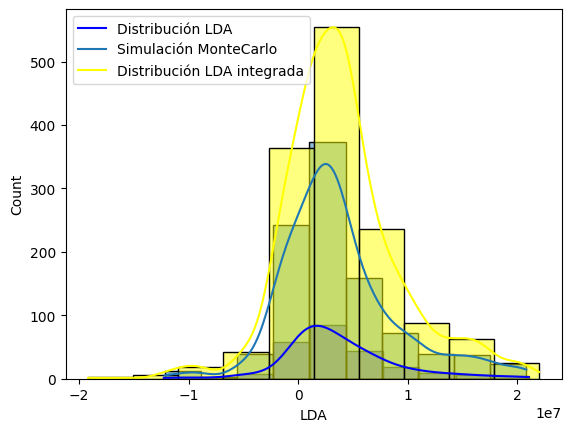

In [ ]:
plt.figure()
sns.histplot(LDAo, bins=10, kde=True, color='blue')
sns.histplot(LDAoMC, bins=10, kde=True, color='red')
sns.histplot(LDAint, bins=10, kde=True, color='yellow')
plt.legend(['Distribución LDA', 'Simulación MonteCarlo', 'Distribución LDA integrada'])
plt.show()

# Análisis de resultados

 Una empresa del sector palmicultor está interesada en la caracterización del riesgo asociado con la pérdida de productividad mensual en sus operaciones. En la base de datos original (LDAo), se tienen registros de eventos de pérdidas relacionados con la ejecución de procesos productivos. Los datos presentan una media de 3.770379, una desviación estándar de 4.984657e+06, un coeficiente de asimetría de 0.79675 y un coeficiente de curtosis de 1.988308.

Tras realizar el muestreo con un tamaño de 1000 datos (LDAoMC) y la integración de datos externos (LDAint), se analizaron los coeficientes de asimetría y curtosis. Los coeficientes de asimetría obtenidos fueron 0.82992 para LDAoMC y 0.51937 para LDAint, en comparación con el valor original de 0.79675. Se observa que los valores cambiaron después de estos procesos, con una reducción más notable en LDAint. Para el coeficiente de curtosis, los valores obtenidos fueron 1.3695 y 1.5389, en contraste con el valor original de 1.9883, indicando que la distribución de las pérdidas experimentó modificaciones. La variación de la asimetría entre LDAoMC (observados) y LDAint (externos) es de 37.42%, mientras que la variación de la curtosis entre ambos es de -12.37%.

Los coeficientes de asimetría positivos indican que las pérdidas esperadas tienden a ser mayores, mientras que la ocurrencia de pérdidas catastróficas (OpVar) es mucho menor. Tanto los datos originales como los muestreados presentan coeficientes de asimetría y curtosis relativamente bajos, lo que sugiere que los valores no cambiaron de manera drástica, aunque sí hubo ajustes en la estructura de los datos.



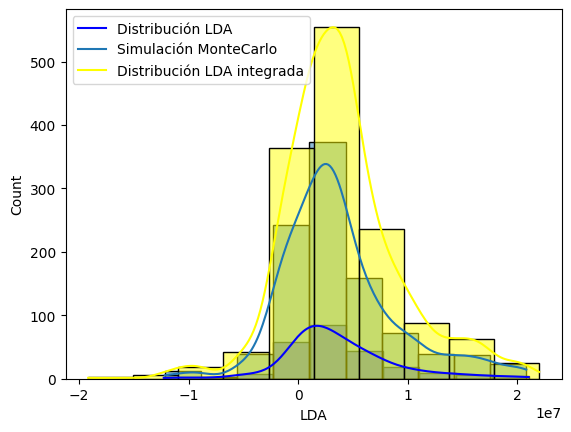

Gráficamente se observa que las distribuciones de LDAoMC y LDAint mantienen similitudes con la distribución original (LDAo, reflejando en ocasiones un ajuste en la estructura de los datos. La gráfica muestra que:

* La distribución original (azul) es más dispersa.
* La simulación Monte Carlo (celeste) presenta una mayor concentración de valores en el centro.
* La distribución integrada (amarilla) es la más pronunciada, con una mayor densidad en valores cercanos a la media.

Estos resultados confirman la reducción en la variabilidad y concentración de eventos extremos tras la integración de datos externos.

El análisis de los límites inferior (LI) y superior (LS) de la media (u +/- ek) muestra que a medida que se incorporan más datos, la precisión en la estimación de la media mejora. En la base de datos original, los valores obtenidos fueron LI = 1.354031e+07 y LS = -5.999548e+06. Para LDAoMC, estos valores fueron LI = 1.413220e+07 y LS = -6.694203e+06, mientras que en LDAint se ajustaron a LI = 1.435454e+07 y LS = -6.465055e+06. Se observa que los valores cambiaron después de estos procesos, reflejando una variabilidad menor en la estimación de la media.

Las bases de datos externas con mejor credibilidad frente a los datos internos son la de la Zona 4 (LDAe4) con un 34,89%. Al contrario, las demás bases de datos externas presentan menores valores de credibilidad así Zona 3 (LDAe3) con un 5,3%, Zona 2 (LDAe2) con un 4,05% y Zona 1 (LDAe19 con un 2,54%. Sin embargo, son las bases 2 y 3 quienes según el modelo de aceptación y rechazo permiten la mayor integración de datos a la base interna (212 y 118, correspondientemente), y la base 4 que era la de mayor credibilidad muestra la posibilidad de integrar 51 datos. Al final la base de datos interna queda con 1398 datos después de la integración.
